In [2]:
import h5py
import numpy as np

with h5py.File('data/nogrid/DC4/taxi_data.h5', 'r') as f:
    taxi_pick = np.array(f['taxi_pick'])
    taxi_drop = np.array(f['taxi_drop'])

# Bỏ 1440 dòng cuối (tức là chỉ lấy từ 0 đến -1440)
taxi_pick_new = taxi_pick[:-1440]
taxi_drop_new = taxi_drop[:-1440]

with h5py.File('data/nogrid/DC4/taxi_data_7_8.h5', 'w') as f:
    f.create_dataset('taxi_pick', data=taxi_pick_new)
    f.create_dataset('taxi_drop', data=taxi_drop_new)


NYC Bike: T = 4368, N = 250


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


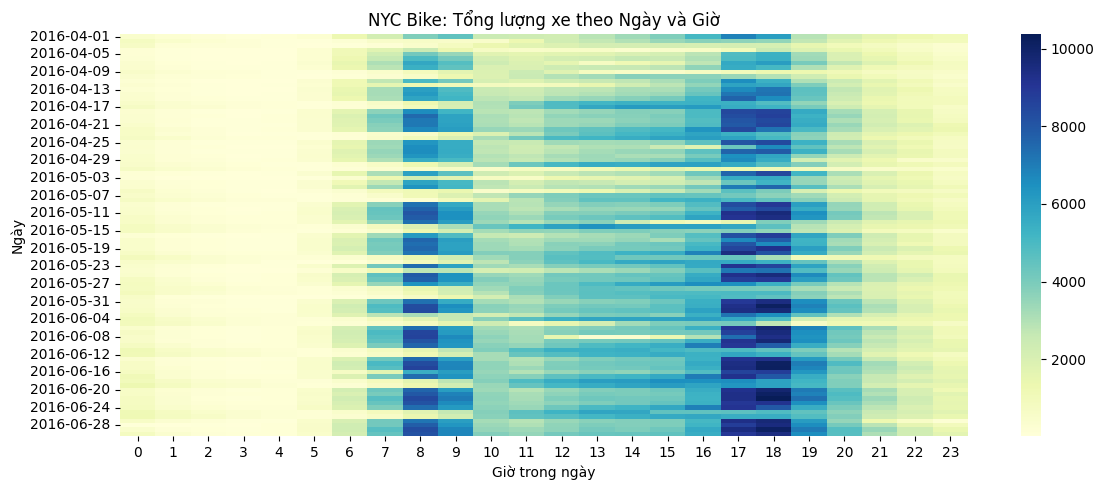

C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


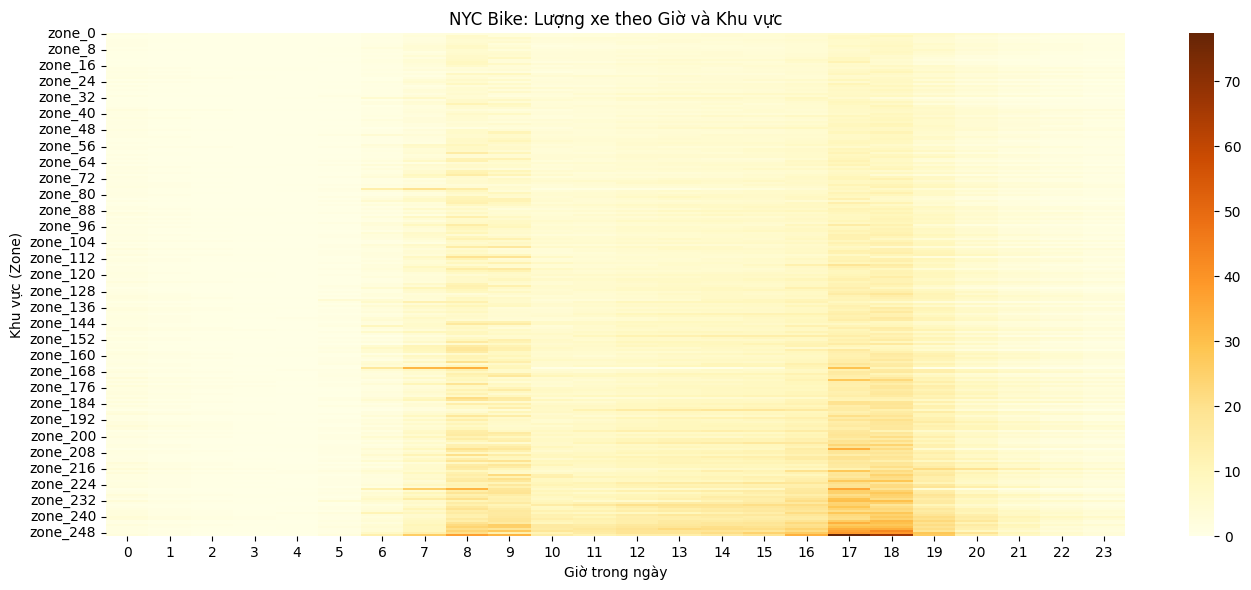

NYC Taxi: T = 4368, N = 266


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


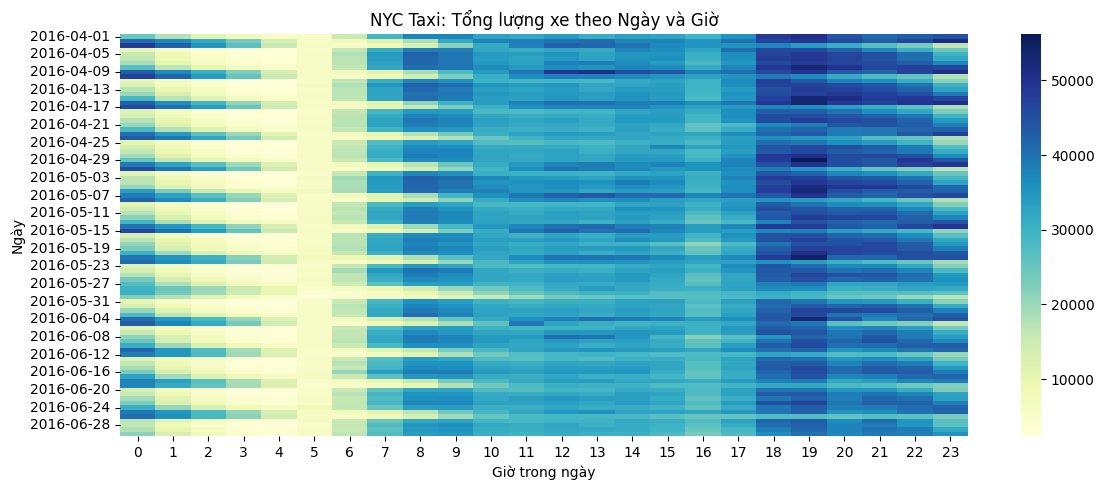

C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


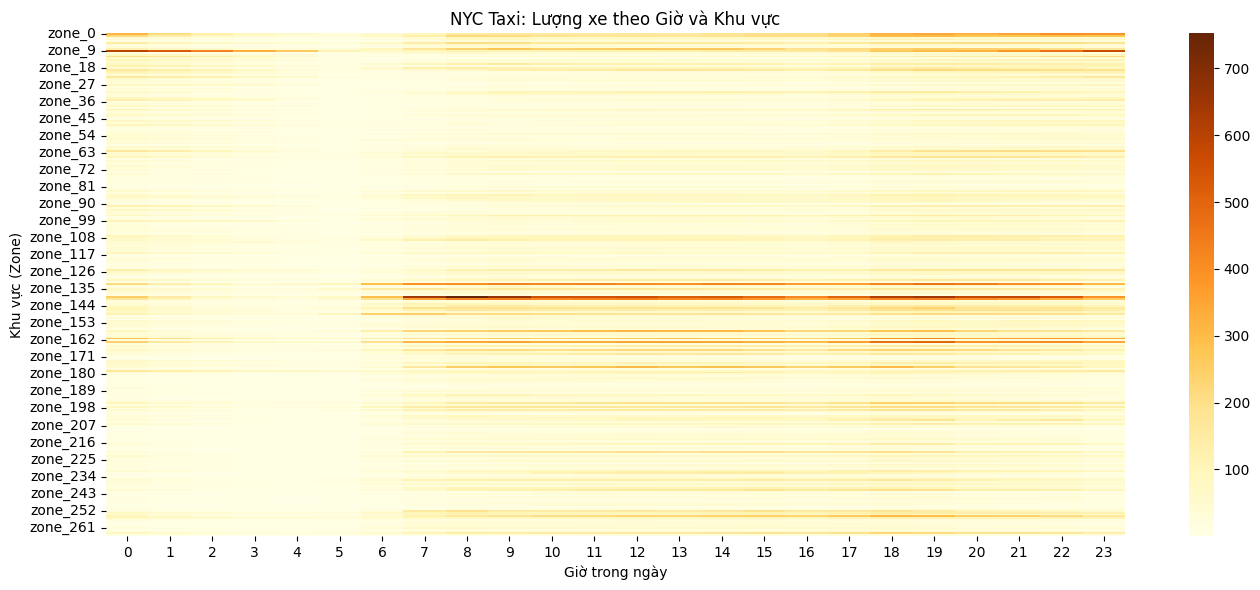

CHI Taxi: T = 4416, N = 77


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


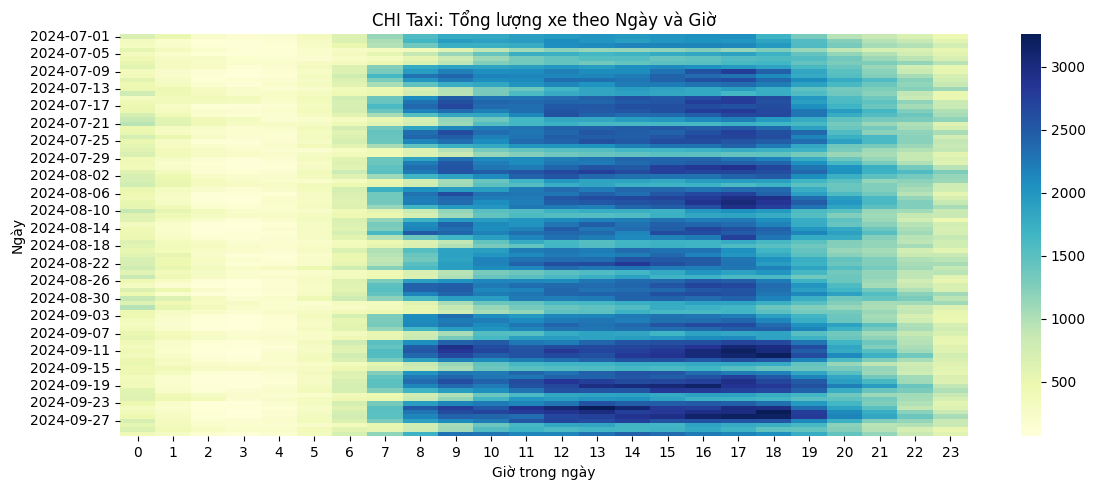

C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


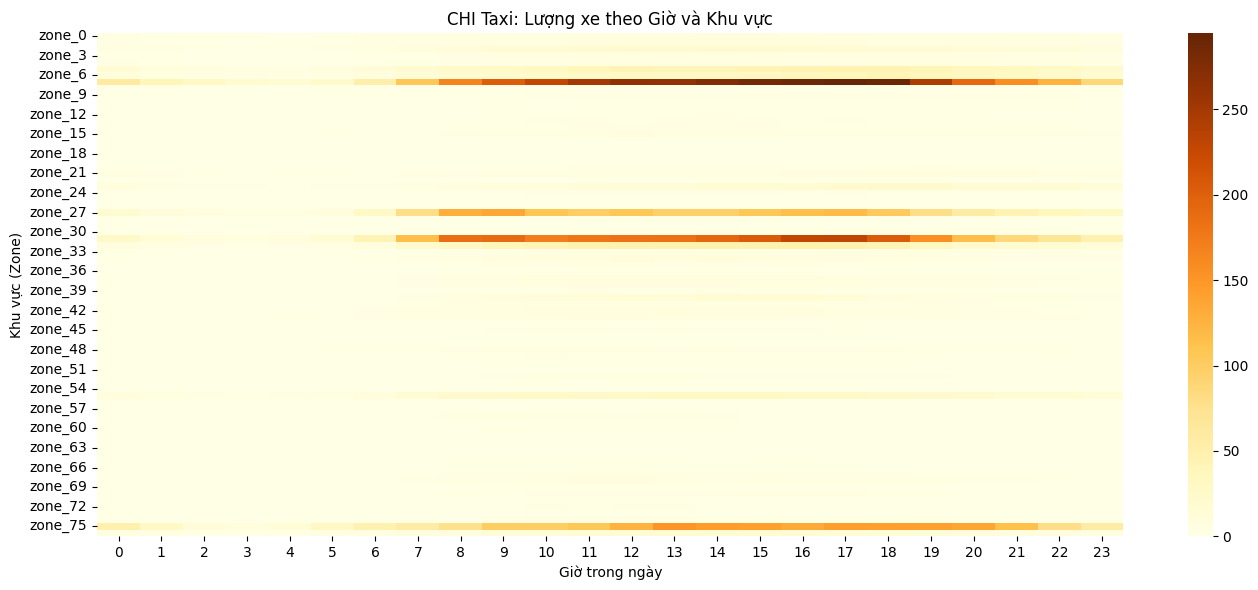

DC4 Taxi: T = 4416, N = 271


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py

def plot_city_heatmaps(file_path, city_name, pick_key='bike_pick', drop_key='bike_drop', start_time_str='2016-04-01 00:00:00'):
    with h5py.File(file_path, 'r') as f:
        bike_pick = np.array(f[pick_key])
        bike_drop = np.array(f[drop_key])
    T, N = bike_pick.shape
    print(f"{city_name}: T = {T}, N = {N}")
    start_time = pd.Timestamp(start_time_str)
    time_index = pd.date_range(start=start_time, periods=T, freq='30min')
    df_pick = pd.DataFrame(bike_pick, index=time_index, columns=[f'zone_{i}' for i in range(N)])
    df_drop = pd.DataFrame(bike_drop, index=time_index, columns=[f'zone_{i}' for i in range(N)])
    df_total = df_pick + df_drop
    df_total['day'] = df_total.index.date
    df_total['hour'] = df_total.index.floor('H').hour

    heatmap_day_hour = df_total.groupby(['day', 'hour']).sum().sum(axis=1).unstack()
    plt.figure(figsize=(12, 5))
    sns.heatmap(heatmap_day_hour, cmap='YlGnBu')
    plt.title(f"{city_name}: Tổng lượng xe theo Ngày và Giờ")
    plt.xlabel("Giờ trong ngày")
    plt.ylabel("Ngày")
    plt.tight_layout()
    plt.show()

    df_hour_zone = df_total.drop(columns=['day', 'hour'])
    df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour
    heatmap_zone_hour = df_hour_zone.groupby('hour').mean().T
    plt.figure(figsize=(14, 6))
    sns.heatmap(heatmap_zone_hour, cmap='YlOrBr')
    plt.title(f"{city_name}: Lượng xe theo Giờ và Khu vực")
    plt.xlabel("Giờ trong ngày")
    plt.ylabel("Khu vực (Zone)")
    plt.tight_layout()
    plt.show()


    if city_name in ['DC Bike', 'Bay Bike']:
        zone_sums = df_hour_zone.drop(columns=['hour']).sum()
        max_zone = zone_sums.idxmax()
        print(f"Bỏ node hoạt động mạnh nhất: {max_zone}")
        df_hour_zone = df_hour_zone.drop(columns=[max_zone])

        heatmap_zone_hour = df_hour_zone.groupby('hour').mean().T
        plt.figure(figsize=(14, 6))
        sns.heatmap(heatmap_zone_hour, cmap='YlOrBr')
        plt.title(f"{city_name}: Lượng xe theo Giờ và Khu vực (bỏ node hoạt động mạnh nhất)" if city_name in ['DC Bike', 'Bay Bike'] else f"{city_name}: Lượng xe theo Giờ và Khu vực")
        plt.xlabel("Giờ trong ngày")
        plt.ylabel("Khu vực (Zone)")
        plt.tight_layout()
        plt.show()

city_files = [
    {'file': 'data/nogrid/NYC/bike_data.h5', 'city': 'NYC Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2016-04-01 00:00:00'},
    {'file': 'data/nogrid/NYC/taxi_data.h5', 'city': 'NYC Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2016-04-01 00:00:00'},
    {'file': 'data/nogrid/CHI/taxi_data.h5', 'city': 'CHI Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC4/taxi_data.h5', 'city': 'DC4 Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC4/taxi_data_7_8.h5', 'city': 'DC4 Taxi 7 8', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC3/taxi_data.h5', 'city': 'DC3 Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC2/taxi_data.h5', 'city': 'DC2 Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BOSTON/bike_data.h5', 'city': 'Boston Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BOSTON2/bike_data.h5', 'city': 'Boston2 Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BAY/bike_data.h5', 'city': 'Bay Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BAY2/bike_data.h5', 'city': 'Bay2 Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC/bike_data.h5', 'city': 'DC Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC2/bike_data.h5', 'city': 'DC2 Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
]

for info in city_files:
    plot_city_heatmaps(info['file'], info['city'], info['pick_key'], info['drop_key'], info['start'])

In [1]:
import pandas as pd

a = pd.read_csv("Taxi_Trips__2024-_.csv (2).csv")
a.info()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536512 entries, 0 to 6536511
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

Đang đọc dữ liệu...
Tổng số bản ghi: 6,536,512
Kích thước dữ liệu: (6536512, 23)
Đang xử lý timestamp...


C:\Users\Admin\AppData\Local\Temp\ipykernel_5804\1879847754.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])



THỐNG KÊ TỔNG QUAN
Tổng số tháng có dữ liệu: 17
Tổng số lượt yêu cầu: 6,536,512
Trung bình lượt yêu cầu/tháng: 384,501
Từ: 2024-01-01 đến 2025-05-31

CHI TIẾT THEO TỪNG THÁNG
Tháng        Số lượt yêu cầu % của tổng  
----------------------------------------
2024-01      425,203         6.51        %
2024-02      440,013         6.73        %
2024-03      524,134         8.02        %
2024-04      546,369         8.36        %
2024-05      619,945         9.48        %
2024-06      608,266         9.31        %
2024-07      546,279         8.36        %
2024-08      563,732         8.62        %
2024-09      563,224         8.62        %
2024-10      598,969         9.16        %
2024-11      540,185         8.26        %
2024-12      492,143         7.53        %
2025-01      38,481          0.59        %
2025-02      25,604          0.39        %
2025-03      87              0.00        %
2025-04      3,847           0.06        %
2025-05      31              0.00        %

THỐNG KÊ 

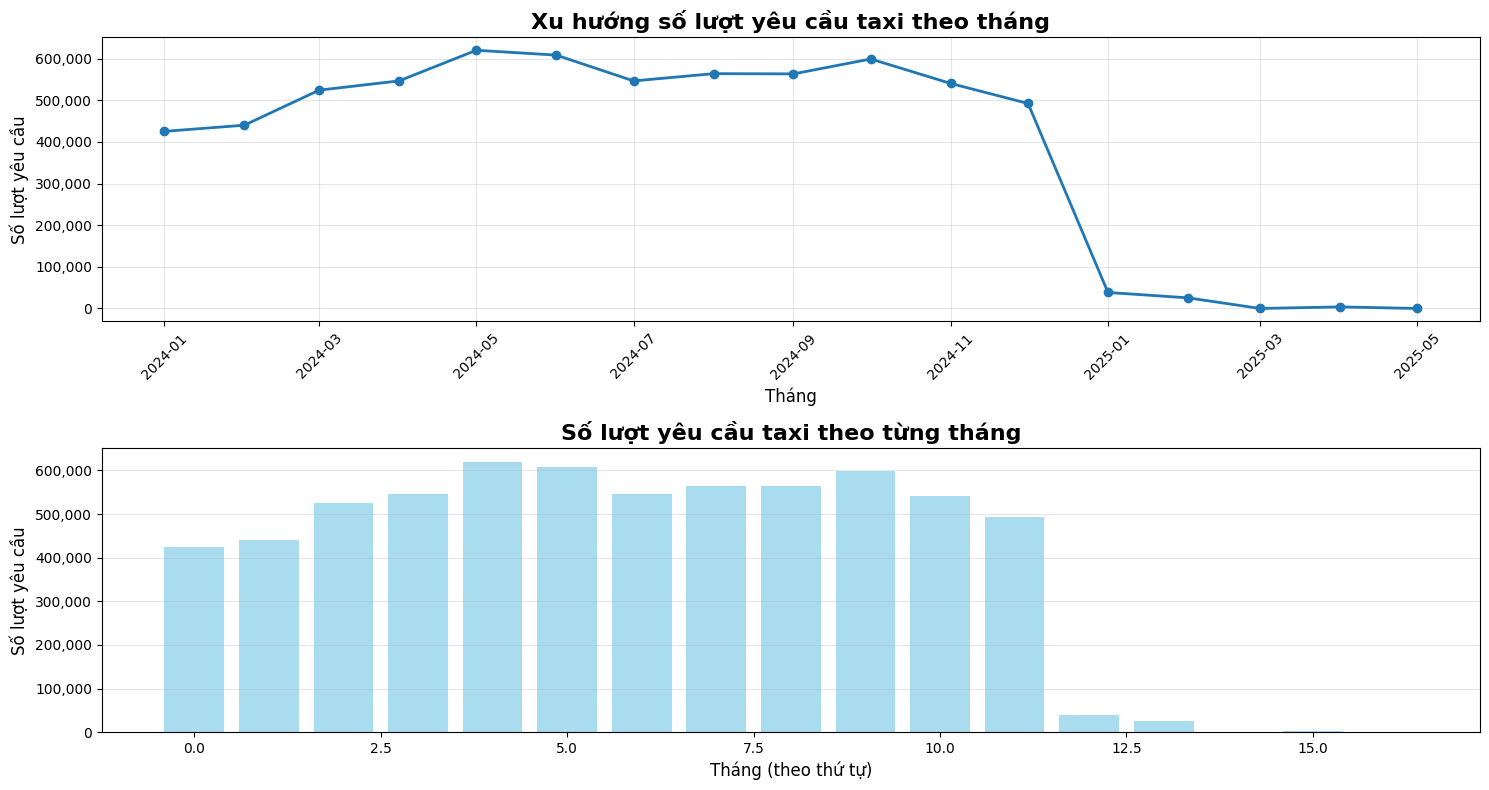

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_taxi_trips(csv_file_path):
    """
    Phân tích dữ liệu taxi trips để đếm số tháng và số lượt yêu cầu trong mỗi tháng
    """
    print("Đang đọc dữ liệu...")
    # Đọc dữ liệu CSV
    df = pd.read_csv(csv_file_path)
    
    print(f"Tổng số bản ghi: {len(df):,}")
    print(f"Kích thước dữ liệu: {df.shape}")
    
    # Chuyển đổi Trip Start Timestamp thành datetime
    print("Đang xử lý timestamp...")
    df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
    
    # Tạo cột tháng-năm để group by
    df['Year_Month'] = df['Trip Start Timestamp'].dt.to_period('M')
    
    # Đếm số lượt yêu cầu theo từng tháng
    monthly_counts = df.groupby('Year_Month').size().reset_index(name='Trip_Count')
    monthly_counts['Year_Month_Str'] = monthly_counts['Year_Month'].astype(str)
    
    # Thống kê tổng quan
    total_months = len(monthly_counts)
    total_trips = len(df)
    avg_trips_per_month = total_trips / total_months
    
    print("\n" + "="*60)
    print("THỐNG KÊ TỔNG QUAN")
    print("="*60)
    print(f"Tổng số tháng có dữ liệu: {total_months}")
    print(f"Tổng số lượt yêu cầu: {total_trips:,}")
    print(f"Trung bình lượt yêu cầu/tháng: {avg_trips_per_month:,.0f}")
    
    # Thời gian từ đầu đến cuối
    start_date = df['Trip Start Timestamp'].min()
    end_date = df['Trip Start Timestamp'].max()
    print(f"Từ: {start_date.strftime('%Y-%m-%d')} đến {end_date.strftime('%Y-%m-%d')}")
    
    print("\n" + "="*60)
    print("CHI TIẾT THEO TỪNG THÁNG")
    print("="*60)
    print(f"{'Tháng':<12} {'Số lượt yêu cầu':<15} {'% của tổng':<12}")
    print("-" * 40)
    
    for _, row in monthly_counts.iterrows():
        percentage = (row['Trip_Count'] / total_trips) * 100
        print(f"{row['Year_Month_Str']:<12} {row['Trip_Count']:<15,} {percentage:<12.2f}%")
    
    # Tháng có nhiều yêu cầu nhất và ít nhất
    max_month = monthly_counts.loc[monthly_counts['Trip_Count'].idxmax()]
    min_month = monthly_counts.loc[monthly_counts['Trip_Count'].idxmin()]
    
    print("\n" + "="*60)
    print("THỐNG KÊ NÂNG CAO")
    print("="*60)
    print(f"Tháng có nhiều yêu cầu nhất: {max_month['Year_Month_Str']} ({max_month['Trip_Count']:,} lượt)")
    print(f"Tháng có ít yêu cầu nhất: {min_month['Year_Month_Str']} ({min_month['Trip_Count']:,} lượt)")
    print(f"Chênh lệch: {max_month['Trip_Count'] - min_month['Trip_Count']:,} lượt")
    
    # Thống kê theo năm
    df['Year'] = df['Trip Start Timestamp'].dt.year
    yearly_counts = df.groupby('Year').size()
    
    print(f"\nThống kê theo năm:")
    for year, count in yearly_counts.items():
        print(f"Năm {year}: {count:,} lượt yêu cầu")
    
    return monthly_counts, df

def plot_monthly_trends(monthly_counts):
    """
    Vẽ biểu đồ xu hướng theo tháng
    """
    plt.figure(figsize=(15, 8))
    
    # Chuyển đổi để có thể plot
    monthly_counts['Date'] = pd.to_datetime(monthly_counts['Year_Month'].astype(str))
    
    plt.subplot(2, 1, 1)
    plt.plot(monthly_counts['Date'], monthly_counts['Trip_Count'], marker='o', linewidth=2, markersize=6)
    plt.title('Xu hướng số lượt yêu cầu taxi theo tháng', fontsize=16, fontweight='bold')
    plt.xlabel('Tháng', fontsize=12)
    plt.ylabel('Số lượt yêu cầu', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Format y-axis với dấu phẩy
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.subplot(2, 1, 2)
    plt.bar(range(len(monthly_counts)), monthly_counts['Trip_Count'], alpha=0.7, color='skyblue')
    plt.title('Số lượt yêu cầu taxi theo từng tháng', fontsize=16, fontweight='bold')
    plt.xlabel('Tháng (theo thứ tự)', fontsize=12)
    plt.ylabel('Số lượt yêu cầu', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Format y-axis với dấu phẩy
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Đường dẫn đến file CSV
    csv_file = "Taxi_Trips__2024-_.csv (2).csv"
    
    try:
        monthly_data, df = analyze_taxi_trips(csv_file)
        
        # Vẽ biểu đồ
        plot_monthly_trends(monthly_data)
        
        # # Lưu kết quả ra file
        # monthly_data.to_csv("monthly_taxi_stats.csv", index=False)
        # print(f"\nĐã lưu thống kê tháng vào file: monthly_taxi_stats.csv")
        
    except FileNotFoundError:
        print(f"Không tìm thấy file: {csv_file}")
        print("Vui lòng kiểm tra đường dẫn file.")
    except Exception as e:
        print(f"Có lỗi xảy ra: {str(e)}")


In [ ]:
import pandas as pd
import os
from datetime import datetime

def extract_monthly_data(csv_file_path, output_dir="monthly_data"):
    """
    Lọc và lưu dữ liệu taxi theo tháng 7, 8, 9 năm 2024 thành các file riêng
    """
    print("Đang đọc dữ liệu...")
    # Đọc dữ liệu CSV
    df = pd.read_csv(csv_file_path)
    
    print(f"Tổng số bản ghi: {len(df):,}")
    
    # Chuyển đổi Trip Start Timestamp thành datetime
    print("Đang xử lý timestamp...")
    df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
    
    # Tạo thư mục output nếu chưa có
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Đã tạo thư mục: {output_dir}")
    
    # Lọc theo từng tháng và lưu file
    months = [5, 6, 7]  # Tháng 7, 8, 9
    year = 2024
    
    total_extracted = 0
    
    for month in months:
        print(f"\nĐang xử lý tháng {month}/{year}...")
        
        # Lọc dữ liệu theo tháng và năm
        monthly_data = df[
            (df['Trip Start Timestamp'].dt.year == year) & 
            (df['Trip Start Timestamp'].dt.month == month)
        ]
        
        if len(monthly_data) > 0:
            # Tên file output
            output_file = f"{output_dir}/taxi_trips_{year}_{month:02d}.csv"
            
            # Lưu file
            monthly_data.to_csv(output_file, index=False)
            
            print(f"✅ Đã lưu {len(monthly_data):,} bản ghi vào file: {output_file}")
            print(f"   Từ: {monthly_data['Trip Start Timestamp'].min()}")
            print(f"   Đến: {monthly_data['Trip Start Timestamp'].max()}")
            
            total_extracted += len(monthly_data)
        else:
            print(f"❌ Không có dữ liệu cho tháng {month}/{year}")
    
    print(f"\n{'='*60}")
    print(f"TỔNG KẾT")
    print(f"{'='*60}")
    print(f"Tổng số bản ghi đã lọc: {total_extracted:,}")
    print(f"Tỷ lệ dữ liệu lọc được: {(total_extracted/len(df)*100):.2f}%")
    
    return total_extracted

# Chạy phân tích nhanh trước
csv_file = "Taxi_Trips__2024-_.csv (2).csv"

# Lọc và lưu dữ liệu theo tháng
print(f"\n{'='*60}")
extract_monthly_data(csv_file)


Đang đọc dữ liệu...
Tổng số bản ghi: 6,536,512
Đang xử lý timestamp...


C:\Users\Admin\AppData\Local\Temp\ipykernel_5804\623081224.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])


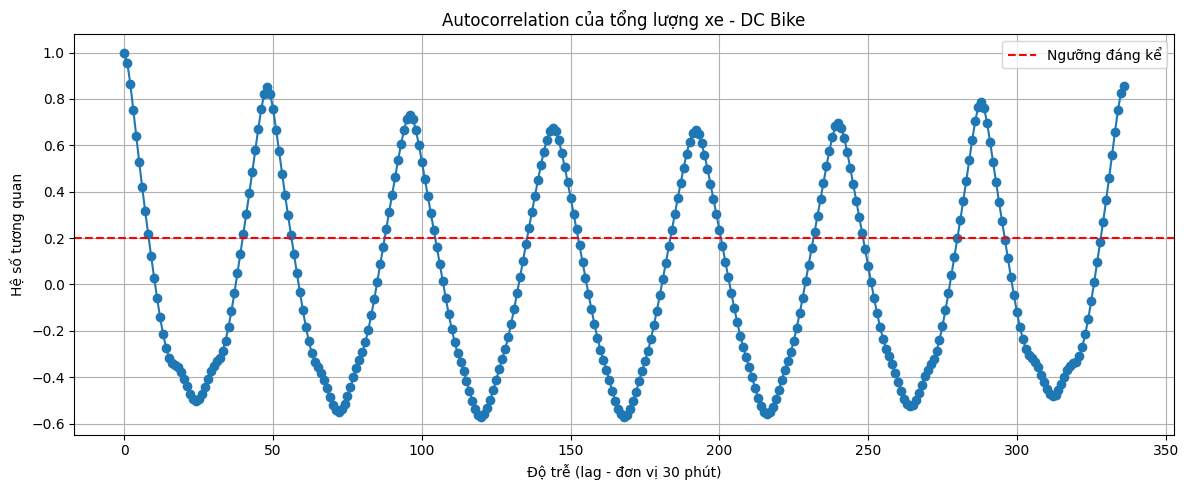

🟢 DC Bike có dấu hiệu phụ thuộc dài hạn ở các độ trễ: [49, 50, 51, 52, 53]...


In [6]:
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
def check_long_term_dependency(file_path, city_name, pick_key='bike_pick', drop_key='bike_drop', start_time_str='2016-04-01 00:00:00', max_lag=336):
    with h5py.File(file_path, 'r') as f:
        bike_pick = np.array(f[pick_key])
        bike_drop = np.array(f[drop_key])
    T, N = bike_pick.shape
    start_time = pd.Timestamp(start_time_str)
    time_index = pd.date_range(start=start_time, periods=T, freq='30min')
    df_pick = pd.DataFrame(bike_pick, index=time_index)
    df_drop = pd.DataFrame(bike_drop, index=time_index)

    # Tổng lượng pick + drop tại mỗi thời điểm (trên toàn thành phố)
    total_volume = df_pick.sum(axis=1) + df_drop.sum(axis=1)

    # Tính hệ số tương quan tự động (autocorrelation)
    autocorr = acf(total_volume, nlags=max_lag, fft=True)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 5))
    plt.plot(range(max_lag + 1), autocorr, marker='o')
    plt.title(f'Autocorrelation của tổng lượng xe - {city_name}')
    plt.xlabel('Độ trễ (lag - đơn vị 30 phút)')
    plt.ylabel('Hệ số tương quan')
    plt.grid(True)
    plt.axhline(y=0.2, color='r', linestyle='--', label='Ngưỡng đáng kể')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Phát hiện phụ thuộc dài hạn nếu autocorrelation vẫn cao tại lag lớn
    significant_lags = [lag for lag, corr in enumerate(autocorr) if lag > 48 and corr > 0.2]
    if significant_lags:
        print(f"🟢 {city_name} có dấu hiệu phụ thuộc dài hạn ở các độ trễ: {significant_lags[:5]}...")
    else:
        print(f"🔵 {city_name} không có dấu hiệu rõ rệt của phụ thuộc dài hạn.")

# Ví dụ: kiểm tra với 1 thành phố
check_long_term_dependency(
    file_path='data/nogrid/DC/bike_data.h5',
    city_name='DC Bike',
    pick_key='bike_pick',
    drop_key='bike_drop',
    start_time_str='2024-07-01 00:00:00',
    max_lag=336  # tương đương 7 ngày nếu mỗi step là 30 phút
)


In [4]:
import numpy as np

def check_data_shape(dataset_path):
    """Kiểm tra shape của dữ liệu"""
    for split in ['train', 'val', 'test']:
        data = np.load(f"{dataset_path}/{split}.npz")
        print(f"=== {split.upper()} DATA ===")
        print(f"X shape: {data['x'].shape}")  # (samples, timesteps, nodes, features)
        print(f"Y shape: {data['y'].shape}")
        print(f"Timesteps per sample: {data['x'].shape[1]}")
        print()

# Chạy để check
check_data_shape("STIDGCN/data/NYC/bike_data")

=== TRAIN DATA ===
X shape: (3001, 12, 250, 2)
Y shape: (3001, 12, 250, 2)
Timesteps per sample: 12

=== VAL DATA ===
X shape: (672, 12, 250, 2)
Y shape: (672, 12, 250, 2)
Timesteps per sample: 12

=== TEST DATA ===
X shape: (672, 12, 250, 2)
Y shape: (672, 12, 250, 2)
Timesteps per sample: 12



In [8]:
check_data_shape("STIDGCN/data/bike_drop")

=== TRAIN DATA ===


X shape: (2606, 12, 250, 3)
Y shape: (2606, 12, 250, 1)
Timesteps per sample: 12

=== VAL DATA ===
X shape: (870, 12, 250, 3)
Y shape: (870, 12, 250, 1)
Timesteps per sample: 12

=== TEST DATA ===
X shape: (869, 12, 250, 3)
Y shape: (869, 12, 250, 1)
Timesteps per sample: 12



🔍 Phân tích dataset: STIDGCN/data/bike_drop

📊 === TRAIN DATA ===
X shape: (2606, 12, 250, 3)
Y shape: (2606, 12, 250, 1)

📈 Chi tiết dimensions:
  Samples (số sequences): 2606
  Timesteps (cửa sổ thời gian): 12
  Nodes (số điểm/stations): 250
  X Features: 3
  Y Features: 1

🔬 Phân tích features của X:
  Feature 0: min=0.0000, max=71.0000, mean=2.4513
    → Có thể là traffic volume/demand data
  Feature 1: min=0.0000, max=0.9792, mean=0.4883
    → Có thể là normalized time feature
  Feature 2: min=0.0000, max=6.0000, mean=2.9292
    → Có thể là hour of day (0-23)

🎯 Phân tích features của Y:
  Feature 0: min=0.0000, max=71.0000, mean=2.4672
    → Target variable (predicted demand)

📋 Sample data (first sequence, first node):
  X[0, :, 0, :] = 
[[0.         0.         0.        ]
 [0.         0.02083333 0.        ]
 [0.         0.04166667 0.        ]
 [0.         0.0625     0.        ]
 [0.         0.08333333 0.        ]
 [0.         0.10416667 0.        ]
 [0.         0.125      0.   

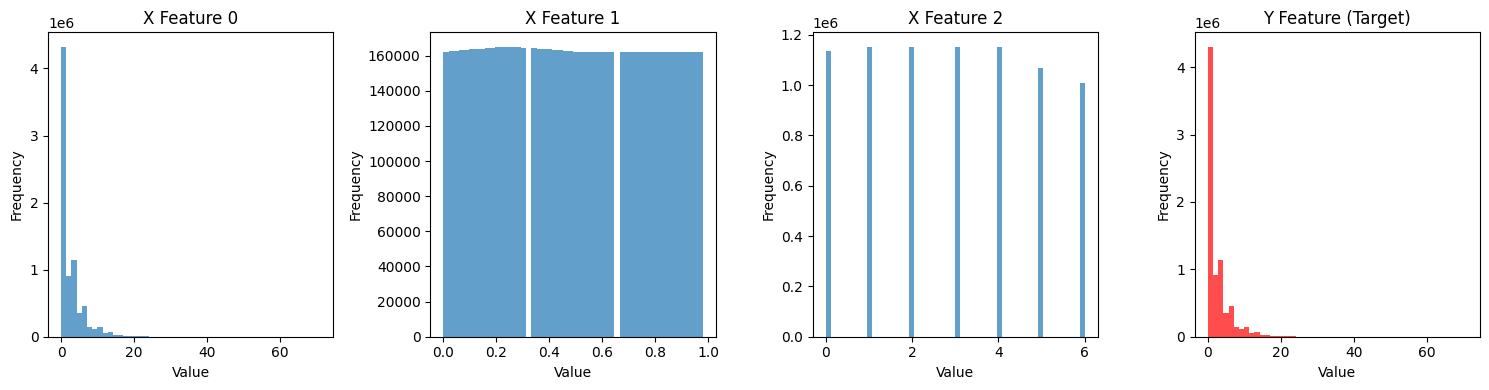

🔄 So sánh datasets:
📊 Bike Drop Dataset:
  X: (2606, 12, 250, 3), Y: (2606, 12, 250, 1)
📊 Combined Dataset:
  X: (3001, 12, 250, 2), Y: (3001, 12, 250, 2)

🔍 Phân tích features:

🟢 Bike Drop - X features:
  Feature 0: min=0.0000, max=71.0000
  Feature 1: min=0.0000, max=0.9792
  Feature 2: min=0.0000, max=6.0000

🔵 Combined - X features:
  Feature 0: min=0.0000, max=96.0000
  Feature 1: min=0.0000, max=71.0000


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_data_dimensions(dataset_path):
    """
    Phân tích chi tiết các chiều của dữ liệu
    """
    print(f"🔍 Phân tích dataset: {dataset_path}")
    print("="*60)
    
    for split in ['train', 'val', 'test']:
        print(f"\n📊 === {split.upper()} DATA ===")
        data = np.load(f"{dataset_path}/{split}.npz")
        
        x_data = data['x']  # Shape: (samples, timesteps, nodes, features)
        y_data = data['y']  # Shape: (samples, timesteps, nodes, features)
        
        print(f"X shape: {x_data.shape}")
        print(f"Y shape: {y_data.shape}")
        
        # Phân tích từng chiều
        samples, timesteps, nodes, x_features = x_data.shape
        _, _, _, y_features = y_data.shape
        
        print(f"\n📈 Chi tiết dimensions:")
        print(f"  Samples (số sequences): {samples}")
        print(f"  Timesteps (cửa sổ thời gian): {timesteps}")
        print(f"  Nodes (số điểm/stations): {nodes}")
        print(f"  X Features: {x_features}")
        print(f"  Y Features: {y_features}")
        
        # Kiểm tra giá trị trong các features
        print(f"\n🔬 Phân tích features của X:")
        for i in range(x_features):
            feature_data = x_data[:, :, :, i]
            print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}, mean={feature_data.mean():.4f}")
            
            # Kiểm tra xem feature có giống thời gian không
            if feature_data.min() >= 0 and feature_data.max() <= 1:
                print(f"    → Có thể là normalized time feature")
            elif feature_data.min() >= 0 and feature_data.max() <= 23:
                print(f"    → Có thể là hour of day (0-23)")
            elif feature_data.min() >= 0 and feature_data.max() <= 6:
                print(f"    → Có thể là day of week (0-6)")
            elif feature_data.min() >= 0 and feature_data.max() <= 47:
                print(f"    → Có thể là time slot in day (0-47 for 30-min intervals)")
            else:
                print(f"    → Có thể là traffic volume/demand data")
        
        print(f"\n🎯 Phân tích features của Y:")
        for i in range(y_features):
            feature_data = y_data[:, :, :, i]
            print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}, mean={feature_data.mean():.4f}")
            print(f"    → Target variable (predicted demand)")
        
        # Sample một vài data points để xem pattern
        print(f"\n📋 Sample data (first sequence, first node):")
        print(f"  X[0, :, 0, :] = \n{x_data[0, :, 0, :]}")
        print(f"  Y[0, :, 0, :] = \n{y_data[0, :, 0, :]}")
        
        print("-" * 40)

def plot_feature_distributions(dataset_path):
    """
    Vẽ biểu đồ phân bố của các features
    """
    data = np.load(f"{dataset_path}/train.npz")
    x_data = data['x']
    y_data = data['y']
    
    samples, timesteps, nodes, x_features = x_data.shape
    
    # Vẽ histogram cho từng feature
    fig, axes = plt.subplots(1, x_features + 1, figsize=(15, 4))
    
    for i in range(x_features):
        feature_data = x_data[:, :, :, i].flatten()
        axes[i].hist(feature_data, bins=50, alpha=0.7)
        axes[i].set_title(f'X Feature {i}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    
    # Y feature
    y_feature_data = y_data[:, :, :, 0].flatten()
    axes[x_features].hist(y_feature_data, bins=50, alpha=0.7, color='red')
    axes[x_features].set_title('Y Feature (Target)')
    axes[x_features].set_xlabel('Value')
    axes[x_features].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def compare_datasets(bike_drop_path, bike_combined_path):
    """
    So sánh dataset bike_drop với dataset combined
    """
    print("🔄 So sánh datasets:")
    print("="*60)
    
    # Load bike_drop data
    drop_data = np.load(f"{bike_drop_path}/train.npz")
    drop_x = drop_data['x']
    drop_y = drop_data['y']
    
    # Load combined data  
    combined_data = np.load(f"{bike_combined_path}/train.npz")
    combined_x = combined_data['x']
    combined_y = combined_data['y']
    
    print(f"📊 Bike Drop Dataset:")
    print(f"  X: {drop_x.shape}, Y: {drop_y.shape}")
    
    print(f"📊 Combined Dataset:")
    print(f"  X: {combined_x.shape}, Y: {combined_y.shape}")
    
    print(f"\n🔍 Phân tích features:")
    
    print(f"\n🟢 Bike Drop - X features:")
    for i in range(drop_x.shape[-1]):
        feature_data = drop_x[:, :, :, i]
        print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}")
    
    print(f"\n🔵 Combined - X features:")
    for i in range(combined_x.shape[-1]):
        feature_data = combined_x[:, :, :, i]
        print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}")

# Chạy phân tích
analyze_data_dimensions("STIDGCN/data/bike_drop")

# Vẽ biểu đồ phân bố
plot_feature_distributions("STIDGCN/data/bike_drop")

# So sánh với combined dataset (nếu có)
try:
    compare_datasets("STIDGCN/data/bike_drop", "STIDGCN/data/NYC/bike_data")
except:
    print("⚠️ Không thể so sánh với combined dataset")